In [ ]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j;ai pris celle qui marche sur mon pc
########## Ne pas executer deux fois #############

## la commande %%capture pour supprimer les sorties des cellules de code

%%capture
!pip install --upgrade tensorflow==2.12.0
!pip install transformers==4.37.1


In [ ]:
########### c'est cette version qu'il faut installer car toute les version que j'installe ici ne marche pas j;ai pris celle qui marche sur mon pc


import tensorflow as tf
import transformers

print("Version de TensorFlow :", tf.__version__)
print("Version de Transformers :", transformers.__version__)

Version de TensorFlow : 2.12.0
Version de Transformers : 4.37.1


In [ ]:
from google.colab import drive
import zipfile
import os
import pandas as pd

import shutil


drive.mount('/content/drive')

chemin_zip_heavy_attacks = "/content/drive/My Drive/yvanolfotso/dataset/AttacksHeavy.zip"
chemin_zip_heavy_benign = "/content/drive/My Drive/yvanolfotso/dataset/BenignHeavy.zip"

chemin_zip_light_attacks = "/content/drive/My Drive/yvanolfotso/dataset/AttacksLight.zip"
chemin_zip_light_benign = "/content/drive/My Drive/yvanolfotso/dataset/BenignLight.zip"


# Fonction pour extraire mes fichiers zip
def extraire_zip(chemin_zip):
    with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
        zip_ref.extractall("/content/extraction_temp")  # Extraction  dans mon répertoire temporaire

# Fonction pour charger les fichiers CSV d'un type spécifique (stateful ou stateless)
def charger_concatener_donnees(sous_dossier, prefixe):
    # Lister tous les fichiers CSV dans le sous-dossier
    fichiers_csv = [f for f in os.listdir(f"{sous_dossier}") if f.startswith(prefixe) and f.endswith('.csv')]
    # Lire chaque fichier CSV et le stocker dans une liste de DataFrames
    dataframes = [pd.read_csv(f"{sous_dossier}/{f}") for f in fichiers_csv]
    # Concaténer les DataFrames en un seul
    return pd.concat(dataframes, ignore_index=True)


# Extraire les fichiers zip
extraire_zip(chemin_zip_heavy_attacks)
extraire_zip(chemin_zip_heavy_benign)
extraire_zip(chemin_zip_light_attacks)
extraire_zip(chemin_zip_light_benign)

# Charger et concaténer les données de la même manière que vous l'avez fait auparavant
stateful_heavy_attack_data = charger_concatener_donnees("/content/extraction_temp/AttacksHeavy", "stateful")
stateful_heavy_benign_data = charger_concatener_donnees("/content/extraction_temp/BenignHeavy", "stateful")
stateless_heavy_attack_data = charger_concatener_donnees("/content/extraction_temp/AttacksHeavy", "stateless")
stateless_heavy_benign_data = charger_concatener_donnees("/content/extraction_temp/BenignHeavy", "stateless")

stateful_light_attack_data = charger_concatener_donnees("/content/extraction_temp/AttacksLight", "stateful")
stateful_light_benign_data = charger_concatener_donnees("/content/extraction_temp/BenignLight", "stateful")
stateless_light_attack_data = charger_concatener_donnees("/content/extraction_temp/AttacksLight", "stateless")
stateless_light_benign_data = charger_concatener_donnees("/content/extraction_temp/BenignLight", "stateless")

# Supprimer le répertoire temporaire après avoir terminé
if os.path.exists("/content/extraction_temp"):
    shutil.rmtree("/content/extraction_temp")


#### concatenation  sur axis = 0 ########

print(" Heavy attack")

heavy_attack = pd.concat([stateful_heavy_attack_data, stateless_heavy_attack_data], axis=0)
print(heavy_attack.shape)

#### j'ajoute la classe / label ######

heavy_attack['class'] = 'heavy_attacks'
print(heavy_attack.shape)

print(" \n")
print(" Heavy Bengnin")

heavy_bengin = pd.concat([stateful_heavy_benign_data, stateless_heavy_benign_data], axis=0)
print(heavy_bengin.shape)

#### j'ajoute la classe / label ######

heavy_bengin['class'] = 'heavy_bengnin'
print(heavy_bengin.shape)

print(" \n")
print(" Light attack")

light_attack = pd.concat([stateful_light_attack_data, stateless_light_attack_data], axis=0)
print(light_attack.shape)

#### j'ajoute la classe / label ######
light_attack['class'] = 'light_attacks'
print(light_attack.shape)


print(" \n")
print(" Light Bengnin")

light_bengin = pd.concat([stateful_light_benign_data, stateless_light_benign_data], axis=0)
print(light_bengin.shape)

#### j'ajoute la classe / label ######
light_bengin['class'] = 'light_bengnin'
print(light_bengin.shape)


################################### CONCATENATION Final des donnee sur axis = 0 #########################

final_data = pd.concat([heavy_attack, heavy_bengin,light_attack,light_bengin], axis=0, ignore_index=True)

# Suppression colonnes redondantes dans les données catégorielles
final_data = final_data.loc[:, ~final_data.columns.duplicated()]

# Vérifier les dimensions du jeu de données final
print("final dataset size \n")
print(final_data.shape)


Mounted at /content/drive
 Heavy attack
(323698, 42)
(323698, 43)
 

 Heavy Bengnin
(250710, 42)
(250710, 43)
 

 Light attack
(53978, 42)
(53978, 43)
 

 Light Bengnin
(82859, 42)
(82859, 43)
final dataset size 

(711245, 43)


In [ ]:
################## Les features ont deja été selectionné avec le code de feature selection dataset 3.  ####################
################## Mais actuellement il faut des jour pour pour que j'obtiens les resultat vue la taille des données d'OU POUR UN DEBUT J'UTILISE LES CARACTERISTIQUE SELCTIONNEE AVEC LE [GOA-GA] DU PAPIER DE 2024


X_categorical = final_data[['rr','A_frequency','FQDN_count','upper','lower','numeric','entropy','special', 'labels', 'labels_max','labels_average','len','rr_type','unique_ttl','timestamp', 'longest_word', 'sld']]

y = final_data['class']

print(X_categorical.shape)

print(y.shape)
print(final_data.shape)



(711245, 17)
(711245,)
(711245, 43)


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from transformers import DistilBertTokenizer

# Supposons que final_data soit votre DataFrame
X_categorical = final_data[['rr', 'A_frequency', 'FQDN_count', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'len', 'rr_type', 'unique_ttl', 'timestamp', 'longest_word', 'sld']]
y = final_data['class']

# Séparer les colonnes numériques et catégorielles
numeric_features = X_categorical.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_categorical.select_dtypes(include=['object']).columns

# Imputation des valeurs manquantes pour les caractéristiques numériques
numeric_imputer = SimpleImputer(strategy='mean')
X_categorical[numeric_features] = numeric_imputer.fit_transform(X_categorical[numeric_features])

# Imputation des valeurs manquantes pour les caractéristiques catégorielles
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_categorical[categorical_features] = categorical_imputer.fit_transform(X_categorical[categorical_features])

# Conversion en DataFrame pour garder les noms des colonnes
X_categorical = pd.DataFrame(X_categorical, columns=numeric_features.tolist() + categorical_features.tolist())

print(X_categorical.shape)
print(y.shape)
print(final_data.shape)

# Conversion de toutes les colonnes en chaînes de caractères
X_categorical_str = X_categorical.astype(str)

# Concaténation des valeurs en une seule chaîne de caractères pour chaque ligne
X_text = X_categorical_str.apply(lambda x: ' '.join(x), axis=1).tolist()

# Tokenisation avec DistilBERTTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokenized_inputs = tokenizer(X_text, padding=True, truncation=True, return_tensors='tf')

print(tokenized_inputs)


<ipython-input-12-cfa3558797f2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[numeric_features] = numeric_imputer.fit_transform(X_categorical[numeric_features])
<ipython-input-12-cfa3558797f2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[categorical_features] = categorical_imputer.fit_transform(X_categorical[categorical_features])


(711245, 17)
(711245,)
(711245, 43)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': <tf.Tensor: shape=(711245, 176), dtype=int32, numpy=
array([[ 101, 1014, 1012, ...,    0,    0,    0],
       [ 101, 1014, 1012, ...,    0,    0,    0],
       [ 101, 1014, 1012, ...,    0,    0,    0],
       ...,
       [ 101, 1014, 1012, ...,    0,    0,    0],
       [ 101, 1014, 1012, ...,    0,    0,    0],
       [ 101, 1014, 1012, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(711245, 176), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}


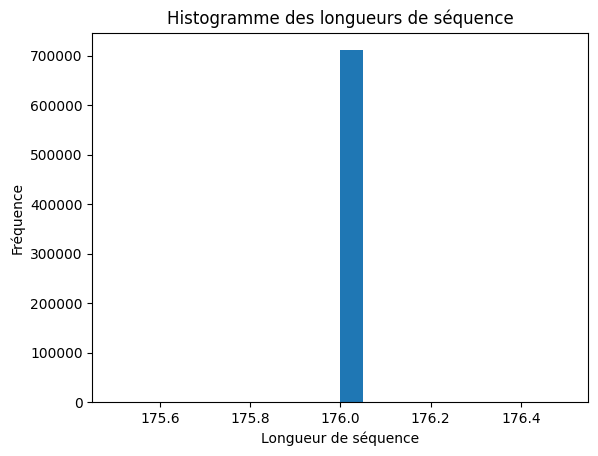

In [ ]:
import matplotlib.pyplot as plt

# Obtenir les longueurs de séquence
sequence_lengths = [len(token_ids) for token_ids in tokenized_inputs['input_ids'].numpy()]

# Afficher l'histogramme des longueurs de séquence
plt.hist(sequence_lengths, bins=20)
plt.title('Histogramme des longueurs de séquence')
plt.xlabel('Longueur de séquence')
plt.ylabel('Fréquence')
plt.show()

In [ ]:
# calcul longueur maximale
max_sequence_length = max(sequence_lengths)

# get l'indice de la plus longue séquence
indice_plus_longue_sequence = sequence_lengths.index(max_sequence_length)

# Longueur de la plus longue séquence
longueur_plus_longue_sequence = sequence_lengths[indice_plus_longue_sequence]

print(f"Longueur maximale du vecteur : {max_sequence_length}")
print(f"Longueur de la plus longue séquence : {longueur_plus_longue_sequence}")


Longueur maximale du vecteur : 176
Longueur de la plus longue séquence : 176


In [ ]:
# Obtenir la longueur maximale
max_sequence_length = max(sequence_lengths)

# Obtenir l'indice de la plus longue séquence
indice_plus_longue_sequence = sequence_lengths.index(max_sequence_length)

# Longueur de la plus longue séquence
longueur_plus_longue_sequence = sequence_lengths[indice_plus_longue_sequence]

print(f"Longueur maximale du vecteur : {max_sequence_length}")
print(f"Longueur de la plus longue séquence : {longueur_plus_longue_sequence}")


Longueur maximale du vecteur : 176
Longueur de la plus longue séquence : 176


In [ ]:
from transformers import TFDistilBertForSequenceClassification,TFDistilBertModel
from tensorflow.keras import layers, Model
# from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam



# TFDistilBertModel
input_ids = layers.Input(shape=(tokenized_inputs['input_ids'].shape[1],), dtype=tf.int32, name="input_ids")
attention_mask = layers.Input(shape=(tokenized_inputs['attention_mask'].shape[1],), dtype=tf.int32, name="attention_mask")

distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
distilbert_output = distilbert_model(input_ids, attention_mask=attention_mask)
text_output = distilbert_output.last_hidden_state[:, 0, :]  # Accéder à la sortie des couches cachées

# Ajouter des couches supplémentaires au besoin
x = layers.Dropout(0.5)(text_output)
x = layers.Dense(16, activation='relu')(x)
output = layers.Dense(4, activation='softmax')(x)  # Par exemple, 4 classes pour votre cible y

# Création et compilation du modèle
model = Model(inputs=[input_ids, attention_mask], outputs=output)
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle pour vérifier l'architecture
model.summary()

print(model.summary())


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 176)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 176)]        0           []                               
                                                                                                  
 tf_distil_bert_model (TFDistil  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 BertModel)                     ast_hidden_state=(N               'attention_mask[0][0]']         
                                one, 176, 768),                                                   
                                 hidden_states=None                                           

In [ ]:
from sklearn.preprocessing import  LabelEncoder

# Encodage des étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes d'origine associées aux classes encodées:", label_encoder.classes_)
print(y_encoded)

Classes d'origine associées aux classes encodées: ['heavy_attacks' 'heavy_bengnin' 'light_attacks' 'light_bengnin']
[0 0 0 ... 3 3 3]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder

# Convertir les tenseurs en arrays numpy
input_ids = tokenized_inputs['input_ids'].numpy()
attention_mask = tokenized_inputs['attention_mask'].numpy()

# Encoder les étiquettes
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Diviser les données : entraînement et test
X_train_ids, X_test_ids, X_train_mask, X_test_mask, y_train, y_test = train_test_split(
    input_ids,
    attention_mask,
    y_encoded,
    test_size=0.2,
    random_state=42
)

# Définir le chemin pour sauvegarder les checkpoints
checkpoint_path = '/content/drive/My Drive/yvanolfotso/bestmodel/model_dataset1_1_checkpoint.h5'

# Créer le rappel ModelCheckpoint pour sauvegarder le meilleur modèle basé sur la validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False  # Sauvegardez le modèle complet, pas seulement les poids
)

# Entraîner le modèle
history = model.fit(
    x={'input_ids': X_train_ids, 'attention_mask': X_train_mask},
    y=y_train,
    epochs=10,
    batch_size=64,
    validation_data=({'input_ids': X_test_ids, 'attention_mask': X_test_mask}, y_test),
    callbacks=[checkpoint_callback]
)


In [ ]:
!pip install keras-tuner


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(
    {'input_ids': X_test, 'attention_mask': tokenized_inputs['attention_mask'][X_test.index]},
    y_test,
    verbose=1
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Prédictions sur les données de test
y_pred_probs = model.predict({'input_ids': X_test, 'attention_mask': tokenized_inputs['attention_mask'][X_test.index]})
y_pred = np.argmax(y_pred_probs, axis=1)

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Rapport de classification complet
report = classification_report(y_test, y_pred)
print(report)


In [ ]:
# Affichage des courbes d'apprentissage et de validation
plt.figure(figsize=(12, 6))

# Plot de la perte d'entraînement et de la perte de validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Courbe de Perte')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot de la précision d'entraînement et de la précision de validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Courbe de Précision')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()

# Afficher les deux sous-plots
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Convertir les indices des classes prédites en étiquettes
y_true_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
y_pred_classes = np.argmax(y_pred, axis=1) if y_pred.ndim > 1 else y_pred

# Calculer l'accuracy pour chaque classe
accuracies = []
for class_label in range(4):  # Il y a 4 classes numérotées de 0 à 3
    y_true_class = (y_true_classes == class_label).astype(int)
    y_pred_class = (y_pred_classes == class_label).astype(int)
    class_accuracy = accuracy_score(y_true_class, y_pred_class)
    accuracies.append(class_accuracy)

# Afficher les accuracies pour chaque classe
for class_label, accuracy in enumerate(accuracies):
    print(f"Accuracy for class {class_label}: {accuracy}")


In [ ]:
# Extraction of training metrics
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting loss and accuracy curves separately
epochs = range(1, len(training_loss) + 1)

# Plotting training and validation curves
plt.figure(figsize=(12, 6))

# Plotting training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training accuracy')
plt.plot(epochs, validation_accuracy, label='Validation accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Displaying both subplots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_names = ['heavy_attacks', 'heavy_benign', 'light_attacks', 'light_benign']

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()


In [ ]:
# Vérifier la forme des tableaux labels_test et y_pred_classes
print("Shape of labels_test:", y_test.shape)
print("Shape of y_pred_classes:", y_pred_classes.shape)

from sklearn.preprocessing import LabelBinarizer

# Binariser labels_test
lb = LabelBinarizer()
labels_test_binary = lb.fit_transform(labels_test)


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcul des courbes ROC et AUC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(labels_test_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotter les courbes ROC pour chaque classe
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour chaque classe')
plt.legend(loc="lower right")
plt.show()
